In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 71 bytes


In [ ]:
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone

100% 1.51G/1.52G [00:58<00:00, 30.5MB/s]
100% 1.52G/1.52G [00:58<00:00, 27.7MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/ct-kidney-dataset-normal-cyst-tumor-and-stone.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
data_dir='/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
train=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.1,
                                                subset='training',seed=123)
val=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.2,
                                                subset='validation',seed=123)

Found 12446 files belonging to 4 classes.
Using 11202 files for training.
Found 12446 files belonging to 4 classes.
Using 2489 files for validation.


In [ ]:
# label_to_class_name = dict(zip(range(len(train.class_names)), train.class_names))
# label_to_class_name
# Check the type of train
if not isinstance(train, tf.data.Dataset):
    raise TypeError("The 'train' object is not of type tf.data.Dataset.")

# Check the existence of class_names attribute
if not hasattr(train, 'class_names'):
    raise AttributeError("The 'train' object does not have the 'class_names' attribute.")

# Print class names
print("Class Names:", train.class_names)



Class Names: ['Cyst', 'Normal', 'Stone', 'Tumor']


In [ ]:

label_to_class_name = {label: class_name for label, class_name in enumerate(train.class_names)}
print("Label to Class Name Mapping:", label_to_class_name)

Label to Class Name Mapping: {0: 'Cyst', 1: 'Normal', 2: 'Stone', 3: 'Tumor'}


In [ ]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


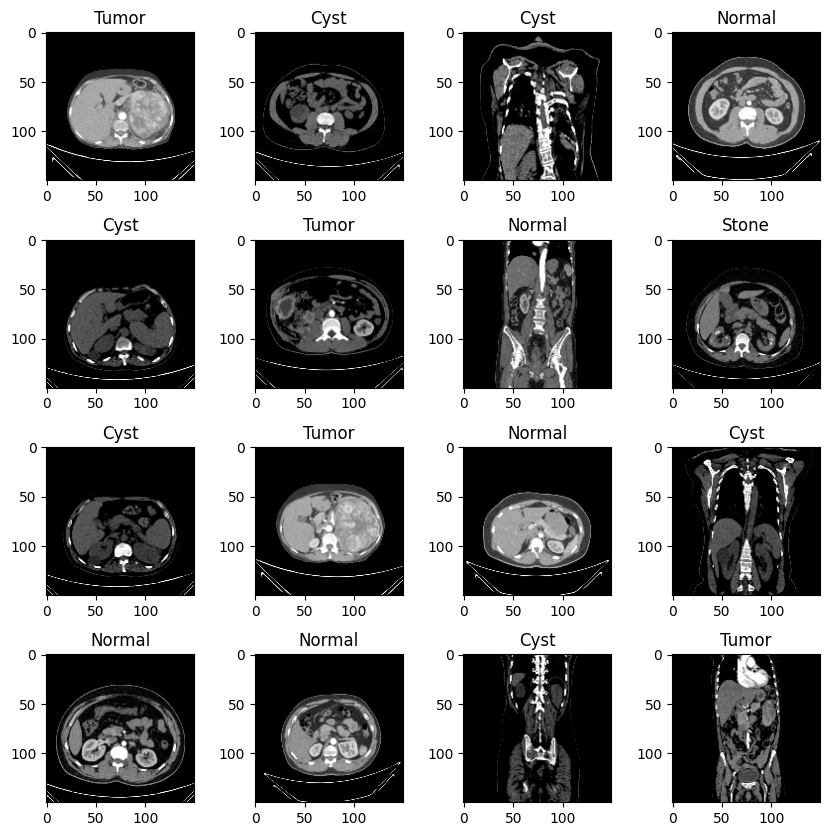

In [ ]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        index = i * 4 + j
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [ ]:
train=train.map(lambda x,y:(x/255,y))
val=val.map(lambda x,y:(x/255,y))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

CNN MODEL

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs=5
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/5
351/351 [==============================] - 363s 1s/step - loss: 0.1118 - accuracy: 0.9623 - val_loss: 7.1487e-04 - val_accuracy: 1.0000
Epoch 2/5
351/351 [==============================] - 319s 909ms/step - loss: 3.2735e-04 - accuracy: 0.9999 - val_loss: 6.9680e-05 - val_accuracy: 1.0000
Epoch 3/5
351/351 [==============================] - 324s 924ms/step - loss: 4.6265e-05 - accuracy: 1.0000 - val_loss: 3.6229e-05 - val_accuracy: 1.0000
Epoch 4/5
351/351 [==============================] - 314s 894ms/step - loss: 2.5873e-05 - accuracy: 1.0000 - val_loss: 2.2472e-05 - val_accuracy: 1.0000
Epoch 5/5
351/351 [==============================] - 358s 1s/step - loss: 1.6760e-05 - accuracy: 1.0000 - val_loss: 1.5218e-05 - val_accuracy: 1.0000


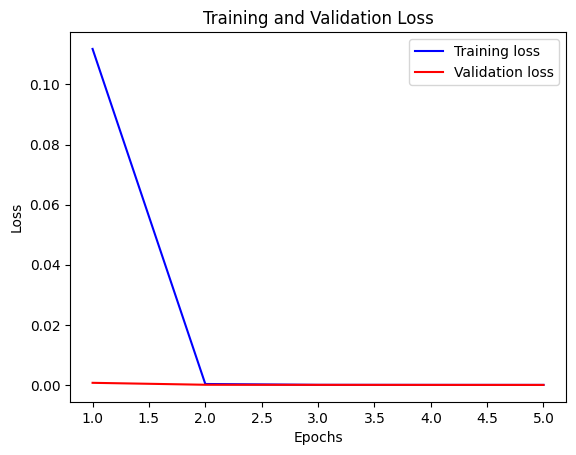

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

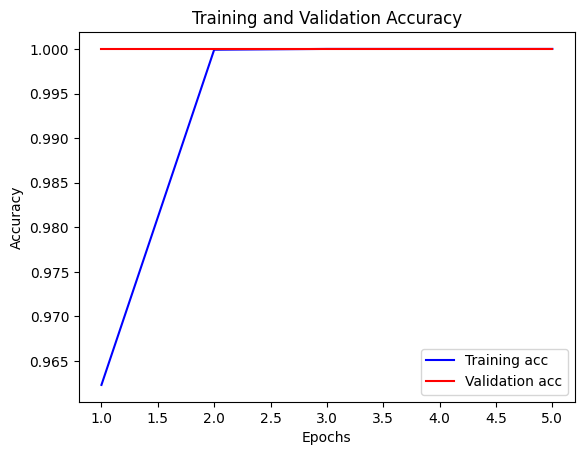

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

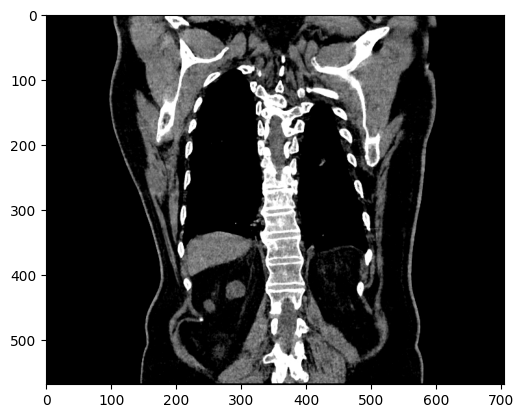

1/1 [==============================] - 0s 131ms/step


'Cyst'

In [ ]:
img = cv2.imread('/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

VGG 16 MODEL

In [ ]:
VGG_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')

VGG_model.add(pretrained_model)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())  # Batch Normalization layer
VGG_model.add(Dropout(0.5))

VGG_model.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
VGG_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
VGG_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                      

In [ ]:
epochs=5
history = VGG_model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/5
351/351 [==============================] - 3579s 10s/step - loss: 0.5029 - accuracy: 0.8127 - val_loss: 0.2635 - val_accuracy: 0.9040
Epoch 2/5
351/351 [==============================] - 3570s 10s/step - loss: 0.2276 - accuracy: 0.9172 - val_loss: 0.1296 - val_accuracy: 0.9502
Epoch 3/5
351/351 [==============================] - 3395s 10s/step - loss: 0.1589 - accuracy: 0.9439 - val_loss: 0.0931 - val_accuracy: 0.9703
Epoch 4/5
351/351 [==============================] - 3380s 10s/step - loss: 0.1340 - accuracy: 0.9530 - val_loss: 0.0955 - val_accuracy: 0.9671
Epoch 5/5
351/351 [==============================] - 3389s 10s/step - loss: 0.1115 - accuracy: 0.9603 - val_loss: 0.0782 - val_accuracy: 0.9719


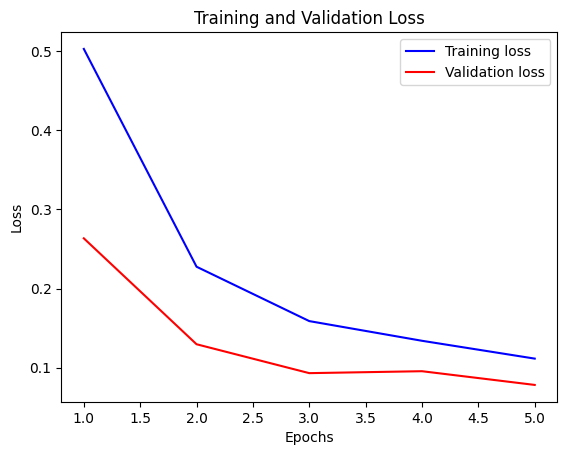

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

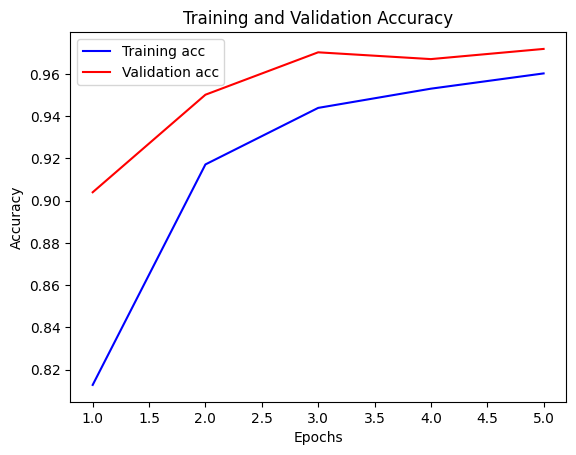

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 1s 982ms/step


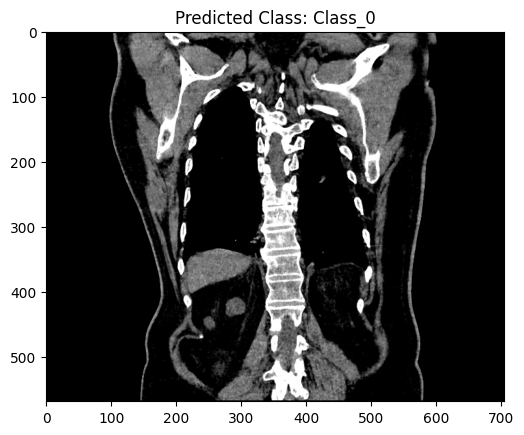

In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Load the image using cv2
img = cv2.imread('/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')

# Convert the image to float32 and normalize to the range [0, 1]
img = img.astype(np.float32) / 255.0

# Resize the image using TensorFlow
resize = tf.image.resize(tf.convert_to_tensor(img), (150, 150))

# Expand dimensions to create a batch of size 1
resize = tf.expand_dims(resize, 0)

# Make predictions using the VGG_model
yhat = VGG_model.predict(resize)

# Get the index with the maximum predicted value
max_index = np.argmax(yhat)

# Assuming you have a dictionary mapping class indices to class names
label_to_class_name = {0: 'Cyst', 1: 'Normal', 2: 'Stone', 3: 'Tumor'}  # Adjust this based on your actual class names and indices

# Get the class name corresponding to the predicted index
predicted_class_name = label_to_class_name[max_index]

# Display the original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f'Predicted Class: {predicted_class_name}')
plt.show()


MOBILENET MODEL

In [ ]:
mobile_net = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')

mobile_net.add(pretrained_model)
mobile_net.add(Flatten())
mobile_net.add(Dense(512, activation='relu'))
mobile_net.add(BatchNormalization())  # Batch Normalization layer
mobile_net.add(Dropout(0.5))
mobile_net.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
mobile_net.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
mobile_net.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                

In [ ]:
epochs=5
history = mobile_net.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/5
351/351 [==============================] - 226s 627ms/step - loss: 0.3917 - accuracy: 0.8624 - val_loss: 0.1545 - val_accuracy: 0.9530
Epoch 2/5
351/351 [==============================] - 217s 619ms/step - loss: 0.1225 - accuracy: 0.9600 - val_loss: 0.0610 - val_accuracy: 0.9823
Epoch 3/5
351/351 [==============================] - 216s 615ms/step - loss: 0.0785 - accuracy: 0.9747 - val_loss: 0.0595 - val_accuracy: 0.9823
Epoch 4/5
351/351 [==============================] - 218s 623ms/step - loss: 0.0679 - accuracy: 0.9782 - val_loss: 0.0188 - val_accuracy: 0.9972
Epoch 5/5
351/351 [==============================] - 221s 631ms/step - loss: 0.0511 - accuracy: 0.9835 - val_loss: 0.0293 - val_accuracy: 0.9912


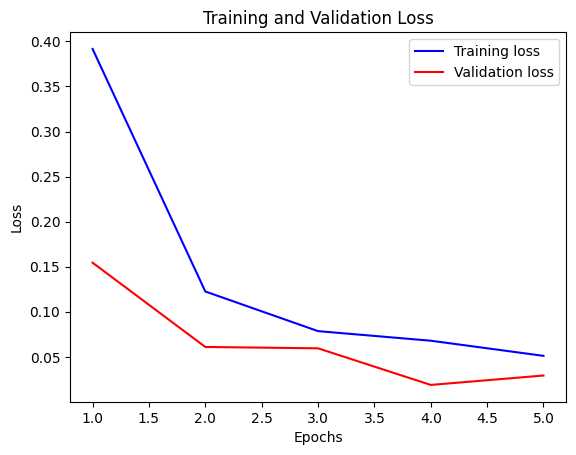

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

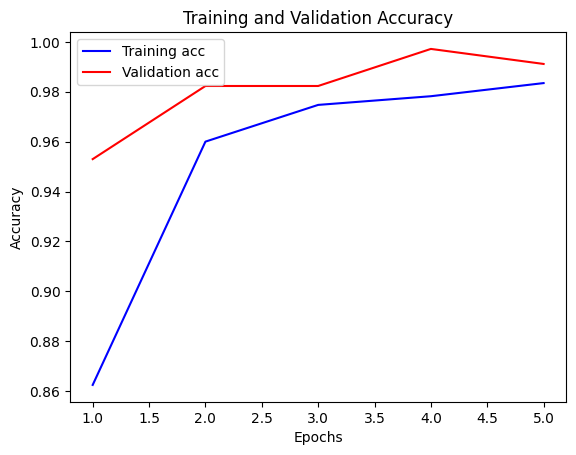

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

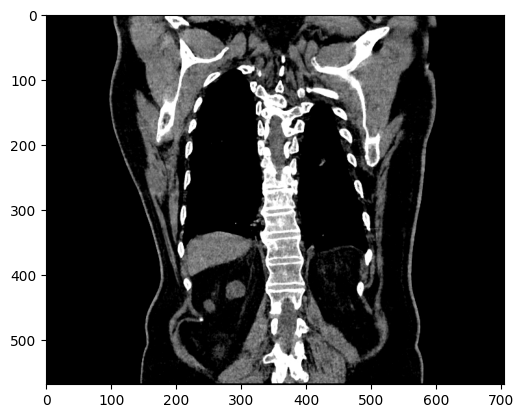

1/1 [==============================] - 1s 937ms/step


'Cyst'

In [ ]:
img = cv2.imread('/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = mobile_net.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

yolo v8

In [ ]:
!pip install ultralytics
!pip install squarify

In [ ]:
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

using a new dataset which is annotated of kidney CT scan images

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 71 bytes


In [ ]:
!kaggle datasets download -d safurahajiheidari/kidney-stone-images

kidney-stone-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "/content/kidney-stone-images.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


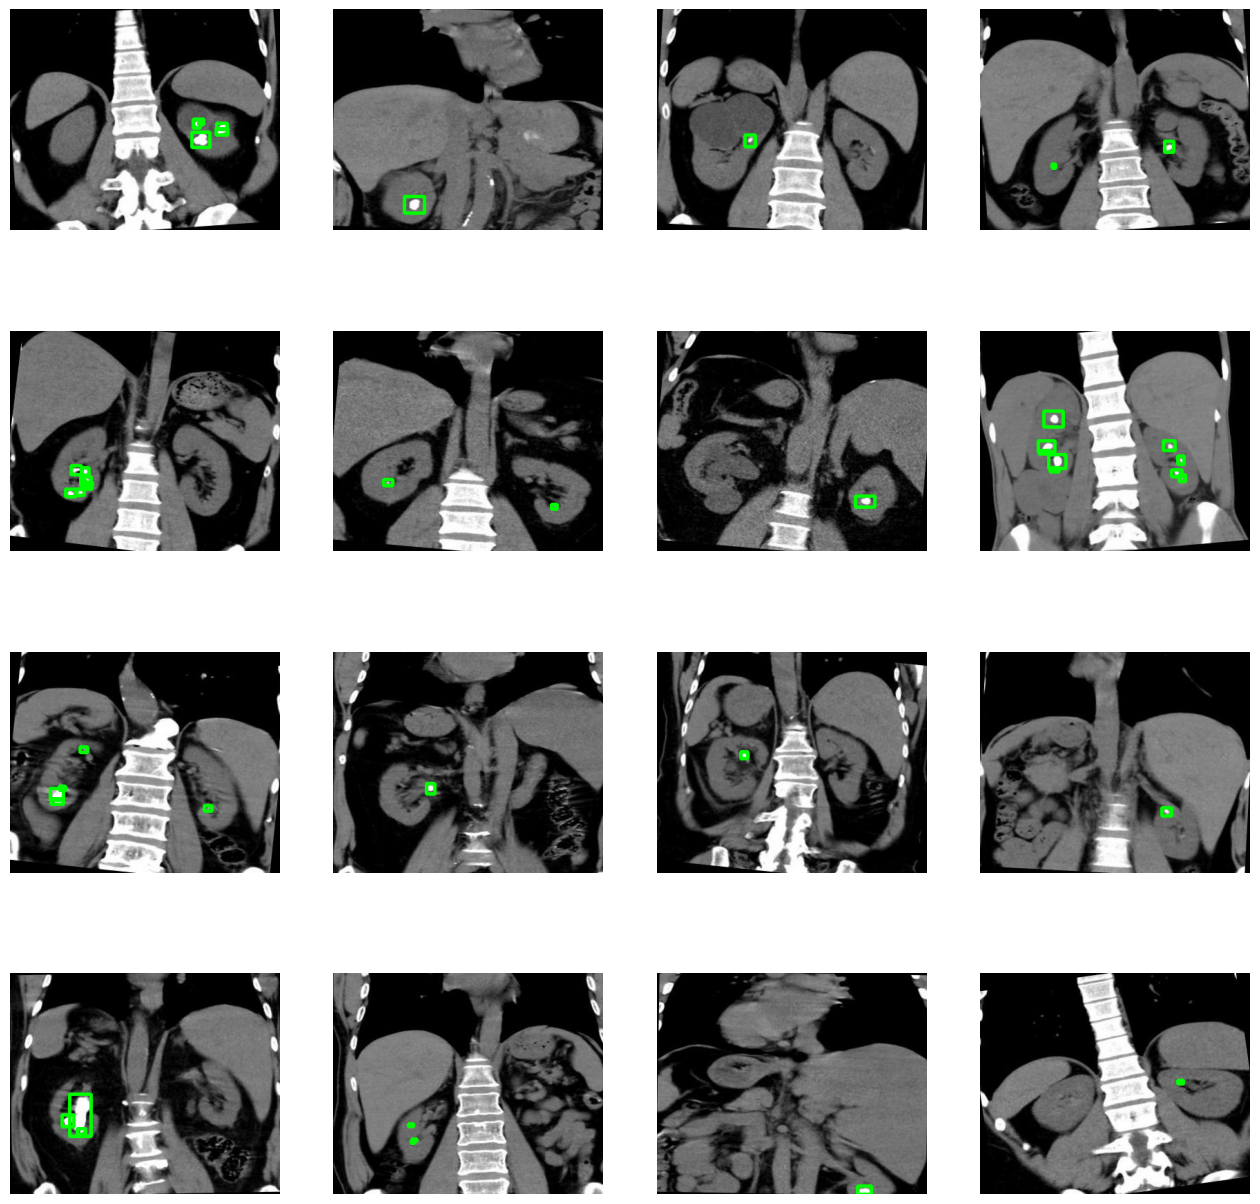

In [ ]:
# Define the paths to the images and labels directories
train_images = "/content/train/images"
train_labels = "/content/train/labels"

test_images = "/content/test/images"
test_labels = "/content/test/labels"

val_images = "/content/valid/images"
val_labels = "/content/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [ ]:
# Loading a pretrained model
model = YOLO('yolov8x.pt')

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
# Training the model
model.train(data = '/content/data.yaml',
            seed = 42,
            epochs = 50,
            lr0=0.001)

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

train: Scanning /content/train/labels.cache... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/66 [00:00<?, ?it/s]